In [ ]:
from sympy.abc import A, D, K, M, T, x, y, r
import numpy as np

In [ ]:
def f(x=x): return (r*x*(1-(x/K)) - A*((x*y)/(D+x)))

In [ ]:
f()

-A*x*y/(D + x) + r*x*(1 - x/K)

In [ ]:
fd = f().subs([(x,M), (K,M), (D, M), (y, M), (r, 1/T)])
fd

-A*M/2

In [ ]:
from sympy import solve

solve(fd - (M/T), A)

[-2/T]

In [ ]:
solve(r*M - (1-(M/T)), r)

[(-M + T)/(M*T)]

In [ ]:
from sympy.abc import N, K, r, t

def dN_dt(t=t): return (r*N*(1-(N/K)))

In [ ]:
dN_dt()

N*r*(1 - N/K)

In [ ]:
dN_dt() / K

N*r*(1 - N/K)/K

In [ ]:
from sympy.abc import t
from sympy import Function

N = Function('N')(t)

def y(t=t): return N.subs(t, t)/K

In [ ]:
y()

N(t)/K

In [ ]:
dy_dt = r*y()*(1-y())
dy_dt

r*(1 - N(t)/K)*N(t)/K

In [ ]:
from sympy import symbols, Symbol, Function, Eq

t = Symbol('t')
phi = symbols('phi')
a = Function('a')
c = Function('c')

'''
da_dt = a.diff(t)
expr_a = Eq(da_dt, -2*phi*a**2 + 2*c)

dc_dt = c.diff(t)
expr_c = Eq(dc_dt, phi*a**2 - c)

expr_a
'''

'\nda_dt = a.diff(t)\nexpr_a = Eq(da_dt, -2*phi*a**2 + 2*c)\n\ndc_dt = c.diff(t)\nexpr_c = Eq(dc_dt, phi*a**2 - c)\n\nexpr_a\n'

In [ ]:
expr_c

Eq(Derivative(c(t), t), phi*a(t)**2 - c(t))

$$ \frac{d}{dt}x(t) + x(t) = cos(t) $$

In [ ]:
from sympy import dsolve, diff, Function

c = Function('c')
a = Function('a')

da_dt = Eq(a(t).diff(t), -2*phi*a(t)**2 + 2*c(t))
res_a = dsolve(da_dt, ics={
    a(0): 1,
})

dc_dt = Eq(c(t).diff(t), phi*a(t)**2 - c(t))
res_c = dsolve(dc_dt, ics={
    c(0): 0,
})

In [ ]:
da_dt

Eq(Derivative(a(t), t), -2*phi*a(t)**2 + 2*c(t))

In [ ]:
res_a

In [ ]:
dc_dt

Eq(Derivative(c(t), t), phi*a(t)**2 - c(t))

In [ ]:
res_c

In [ ]:
from scipy.integrate import odeint

In [ ]:
def func(y, t, phi):
    a, c = y
    dydt = [-2*phi*a**2+2*c, phi*a**2-c]
    return dydt

In [ ]:
t = np.linspace(0, 10, 100)
y0 = [1, 0]
phi = 1.8
sol = odeint(func, y0, t, args=(phi,))

(0.0, 10.0)

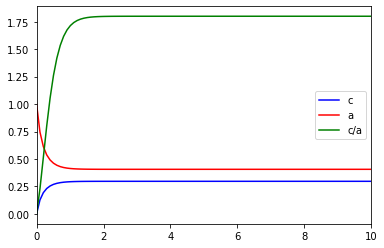

In [ ]:
import matplotlib.pyplot as plt


c__a = [(pt[1]/(pt[0]**2)) for pt in sol]
a, c = zip(*sol)
plt.plot(t, c, label='c', color='blue')
plt.plot(t, a, label='a', color='red')
#plt.plot(t, sol, label=('A', 'B'))
plt.plot(t, c__a, label='c/a', color='green')
plt.legend()
plt.xlim([0,10])

In [ ]:
(c[-1]/a[-1]**2)

1.800000000555805